In [1]:
%matplotlib inline
from pyseidon import FVCOM

In [2]:
fvcomOD=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc')

Retrieving data through OpenDap server...
Initialisation...


In [13]:
from pydap.client import open_url
url='http://www.smast.umassd.edu:8080/thredds/dodsC/fvcom/mwra/fvcom'
nc = open_url(url)

In [17]:
import pyugrid
try:
    ug = pyugrid.UGrid.from_ncfile(url)
    lon = ug.nodes[:,0]
    lat = ug.nodes[:,1]
    nv = ug.faces
except:
    pass

In [20]:
ug.nodes

array([[-70.56564331,  43.30540466],
       [-70.54650116,  43.30025101],
       [-70.52427673,  43.2926712 ],
       ..., 
       [-71.10289764,  42.40766907],
       [-71.10121155,  42.41378403],
       [-71.10549164,  42.41140747]])

In [ ]:
ug.nodes

In [4]:
fvcomWQ=FVCOM(url)

PyseidonError: ---Wrong file format---

In [6]:
import netCDF4 
nc = netCDF4.Dataset(url)
nc.variables

OrderedDict([(u'nprocs', <type 'netCDF4._netCDF4.Variable'>
              int32 nprocs(scalar)
                  long_name: number of processors
              unlimited dimensions: 
              current shape = (1,)
              filling off), (u'partition', <type 'netCDF4._netCDF4.Variable'>
              int32 partition(nele)
                  long_name: partition
                  grid: TWOD_MESH
              unlimited dimensions: 
              current shape = (9739,)
              filling off), (u'Initial_Density',
              <type 'netCDF4._netCDF4.Variable'>
              float32 Initial_Density(siglay, node)
                  long_name: Initial Density
                  grid: SigmaLayer_Mesh
              unlimited dimensions: 
              current shape = (30, 5472)
              filling off), (u'x', <type 'netCDF4._netCDF4.Variable'>
              float32 x(node)
                  long_name: nodal x-coordinate
                  units: meters
                  grid: TWOD

In [6]:
%time 
ax=[-65.77, -65.75, 44.675, 44.685]
tx1=['2013-06-20 12:00:00', '2013-06-21 12:00:00']
tx2=['2013-06-21 12:00:00', '2013-06-21 18:00:00']
fvcomPartial1=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc', ax=ax, tx=tx1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
Retrieving data through OpenDap server...
Initialisation...
Re-indexing may take some time...
-Now working in bounding box-
-Now working in time box-


In [7]:
whos

Variable        Type                                    Data/Info
-----------------------------------------------------------------
FVCOM           classobj                                pyseidon.fvcomClass.fvcomClass.FVCOM
ax              list                                    n=4
fvcomOD         pyseidon.fvcomClass.fvcomClass.FVCOM    <pyseidon.fvcomClass.fvco<...>stance at 0x7f299a752b90>
fvcomPartial1   pyseidon.fvcomClass.fvcomClass.FVCOM    <pyseidon.fvcomClass.fvco<...>stance at 0x7f299a09ecb0>
tx1             list                                    n=2
tx2             list                                    n=2


In [8]:
import sys

/home/usgs/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/usgs/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs


/home/usgs/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


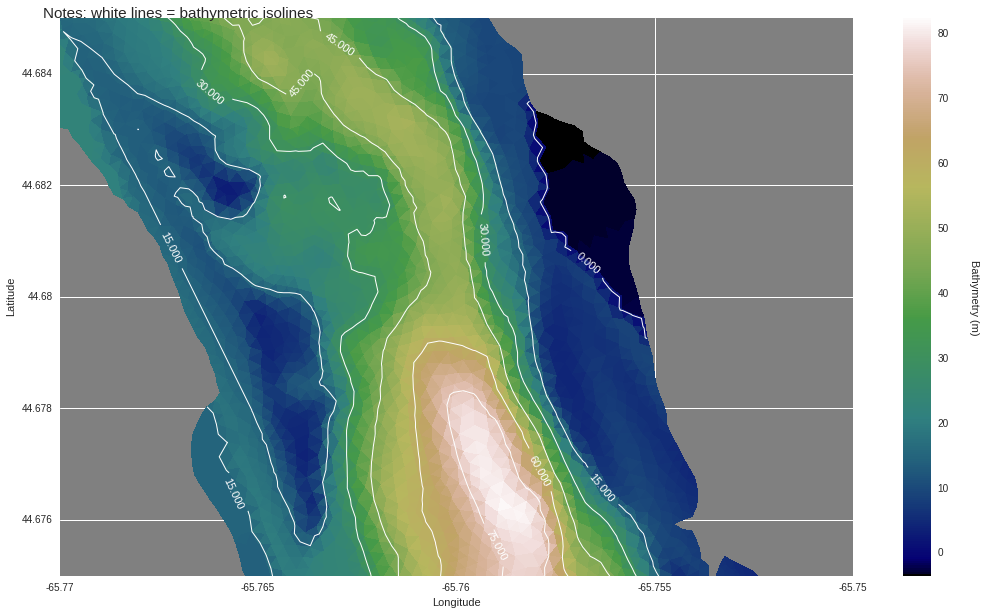

In [12]:
%time
fvcomPartial1.Plots.colormap_var(fvcomPartial1.Grid.h, title='Bathymetry (m)', mesh=False)
